( Projet Eleves --> Correction / ce qui est attendu )
<H1>Mesures empririques des temps de calcul d'algorithmes de tri :</H1>
<H2>Comparaison avec les résultats théoriques.</H2>

<u>Intro :</u>    ...

<u>Contenu :</u>
<li><span><a href="#-I-Le-tri-bulle-:-" data-toc-modified-id="-Le-tri-bulle--1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Le tri bulle </a></span></li>

<u><h2> I Le tri bulle : </h2></u>
<u><b>Principe : </b></u><br/>
Le tri à bulles compare, deux à deux (soit une bulle), les éléments e1 et e2 consécutifs d'un tableau et effectue, en balayant le tableau, une permutation si e1 > e2.<br/>
Les balayages du tableau se renouvellent (sur le tableau de borne supérieure réduite à chaque balayage : (complexité (n-Nb_balayage)  ) jusqu'à ce qu'il n'y ait eu aucune permutation nécessaire dans le balayage en cours.<br/>
<u><b>Complexité : </b></u><br/>
La complexité du 1er  balayage est de : n-1<br/>
La complexité du 2ème balayage est de : n-2<br/>
La complexité du 3ème balayage est de : n-3<br/>
...<br/>
La complexité de l'avant avant dernier balayage est de : n-(n-2) = 2<br/>
La complexité de l'avant dernier balayage est de : n-(n-1) = 1<br/>
La complexité du dernier balayage est de : n-n = 0<br/>
---> La complexité totale est la somme de ces complexités, soit :<br/>
C=0+1+2+...+(n-2)+(n-1)+n ==> D'où : la complexité est la somme des n entiers = [n (n-1 )] / 2<br/>
<u><b>Complexité dans le pire cas : </b></u><br/>
Dans le pire des cas,le tableau est déjà classé à l'envers : il faudra, non seulement, pour chaque balayage, inverser chaque bulle, mais aussi, réaliser tous les balayages à borne supérieure décroissante possible :<br/>
la complexité sera en O(n²).<br/>
<u><b>Complexité dans le cas facile : </b></u><br/>
Dans le meilleur cas, le tableau est déjà classé, et le script ne réalise qu'un seul balayage de complexité (n-1) : <br/>
la complexité sera en O(n).<br/>
<u><b>Explication des jeux de tests présents dans le script : </b></u><br/>
1) un test de precondition : Tous les éléments du tableau doivent être des nombres<br/>
2) un test de postcondition : Le tableau final doit être trié<br/>
...<br/>
<u><b>Script : </b></u><br/>
<u>Référence : </u> http://lwh.free.fr/pages/algo/tri/tri_bulle.html <br/>

In [1]:
def tri_bulle(tableau,Nb_Action_atom):
    longueur_tab=len(tableau)
    for k in range(longueur_tab):
        element=tableau[k]
        typ_element=type(element)
        assert(typ_element!=str),"Tous les éléments du tableau doivent être des nombres" # Pré-condition
    #assert(type(tableau[k] for k in range(longueur_tab)) == int),"Tous les éléments du tableau doivent être des nombres entiers" # Pré-condition
    permutation = True    
    passage = 0
    while permutation == True:
        Nb_Action_atom=Nb_Action_atom+1
        permutation = False
        passage = passage + 1
        for en_cours in range(0, len(tableau) - passage):
            Nb_Action_atom=Nb_Action_atom+1
            if tableau[en_cours] > tableau[en_cours + 1]:
                Nb_Action_atom=Nb_Action_atom+1
                permutation = True
                # On echange les deux elements
                tableau[en_cours], tableau[en_cours + 1] = tableau[en_cours + 1],tableau[en_cours]
    return tableau,Nb_Action_atom
    
Nb_Action_atom=0
liste_initiale=[12,4,7,20,3,9]
print("\nvoici la liste : ",liste_initiale)
liste_triee,Nb_Action_atom=tri_bulle(liste_initiale,Nb_Action_atom)

for k in range(len(liste_triee)-1):
    i,j=liste_triee[k],liste_triee[k+1]
    assert(i<j),"Au final, le tableau doit être trié" # Post-condition

print("\nvoici la même liste triée: ",liste_triee)
print("\nNombre d'action atomique effectuées : ",Nb_Action_atom)


voici la liste :  [12, 4, 7, 20, 3, 9]

voici la même liste triée:  [3, 4, 7, 9, 12, 20]

Nombre d'action atomique effectuées :  28


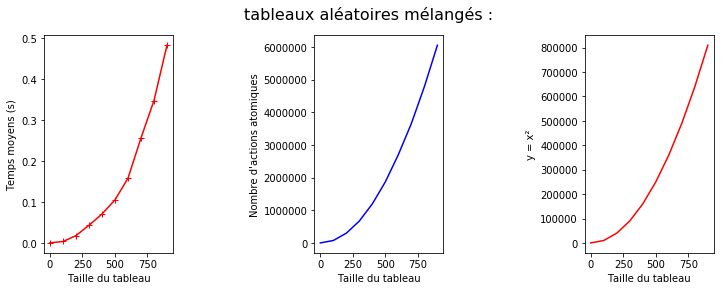

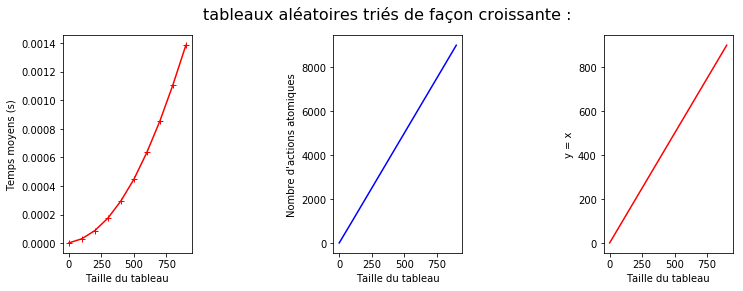

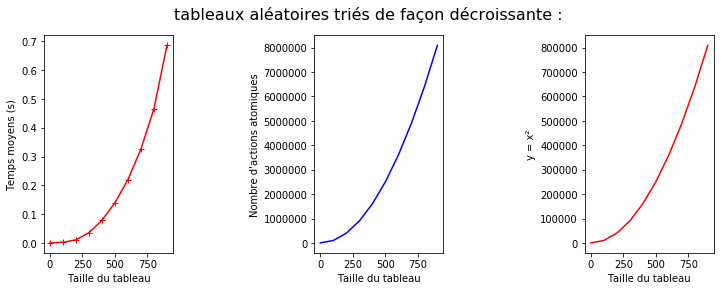

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from timeit import default_timer as timer 
def create_plot(ptype):
    # setting the x-axis vaues
    x = taille
    if ptype == 'temps_empirique':
        y = temps_moy
    if ptype == 'quadratique':
        y = carres
    if ptype == 'lineaire':
        y = x
    elif ptype == 'comptage_theorique':
        y = Nb_Action

    return(x, y)
def Triage_et_stats(propriete):
    liste_temps=[]
    temps_moy=[]
    taille=[]
    Nb_Action=[]
    carres=[]
    for taille_tab in range(0,1000,100):
        Nb_Action_atom=0
        Nb_Action_atom = Nb_Action_atom+1
        for Nb_essai in range(10):
            Nb_Action_atom = Nb_Action_atom+1
            tableau=random.sample(range(taille_tab*10),taille_tab)
        #    print("\ntableau initial : ",tableau)
            if propriete=="mel":
                random.shuffle(tableau)
            #    print("\ntableau mélangé : ",tableau)
            elif propriete=="croiss":
                tableau.sort()
            #    print("\ntableau trié en ordre croissant : ",tableau)
            elif propriete=="decroiss":
                tableau.sort(reverse=True)
            #    print("\ntableau trié en ordre décroissant : ",tableau)            

            start = timer()
            tableau,Nb_Action_atom=tri_bulle(tableau,Nb_Action_atom)
            end = timer()
            temps=(end - start)
        #    print("\ndurée : ",temps," s")
            liste_temps.append(temps)
        somme=sum(liste_temps)
        #print("\nsomme = ",somme," s")
        moyenne=somme/10
        #print("\nmoyenne = ",moyenne," s")
        temps_moy.append(moyenne)
        taille.append(taille_tab)
        carres.append(taille_tab**2)
        Nb_Action.append(Nb_Action_atom)
    return temps_moy,taille,carres,Nb_Action

def graph(propriete,modele):
    if modele=="lineaire":
        ylabel_modele="y = x"
    if modele=="quadratique":
        ylabel_modele="y = x²"
    if propriete=="mel":
        titre="tableaux aléatoires mélangés :"
    elif propriete=="croiss":
        titre="tableaux aléatoires triés de façon croissante :"
    elif propriete=="decroiss":
        titre="tableaux aléatoires triés de façon décroissante :"
    fig = plt.figure(figsize=(12, 4))
    fig.suptitle(titre, fontsize=16)
    plt.subplot(1, 3, 1)
    x, y = create_plot('temps_empirique')
    plt.plot(x, y, marker='+', color ='r')
    #plt.title('A tale of 2 subplots')
    plt.ylabel('Temps moyens (s)')
    plt.xlabel('Taille du tableau')

    plt.subplot(1, 3, 2)
    x, y = create_plot('comptage_theorique')
    plt.plot(x, y,  color ='b')
    plt.ylabel('Nombre d\'actions atomiques')
    plt.xlabel('Taille du tableau')

    plt.subplot(1, 3, 3)
    x, y = create_plot(modele)
    plt.plot(x, y,  color ='r')
    plt.ylabel(ylabel_modele)
    plt.xlabel('Taille du tableau')

    fig.subplots_adjust(wspace=1.1)
#######################################################################
propriete="mel"
modele="quadratique"
temps_moy,taille,carres,Nb_Action=Triage_et_stats(propriete)    
graph(propriete,modele)
###############
propriete="croiss"
modele="lineaire"
temps_moy,taille,carres,Nb_Action=Triage_et_stats(propriete)    
graph(propriete,modele)
###############
propriete="decroiss"
modele="quadratique"
temps_moy,taille,carres,Nb_Action=Triage_et_stats(propriete)    
graph(propriete,modele)

<u><b>Correspondance ? : </b></u><br/>
La courbe des résultats empiriques (mesure des temps moyens en fonction des tailles des tableaux), présente la même forme que la courbe théorique (définie par le nombre d'actions atomiques en fonction des tailles des tableaux).<br/>
Lorsque les tableaux sont déjà triés en ordre croissant, on observe un modèle linéaire ; lorsqu'ils sont triès en ordre décroissant, on observe le modèle quadratique.<br/>
<i><u>Ces profils semblent refléter un comportement quadratique (tel que y=x²) : cela confirme que le tri bulle est bien en O(n²).</u></i>